In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (8.0, 6.0)

15


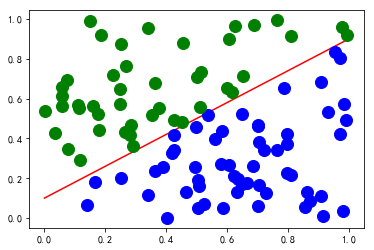

In [39]:
# 产生新画布
fig = plt.figure()
# 获取当前画布
figa = plt.gca()
# 产生100个点
N = 100
i = np.random.randint(N)
print (i)
xn = np.random.rand(N, 2)
# shift + tab 查看函数定义
x = np.linspace(0, 1, num=50)
# 随机产生一条线
a = 0.8
b = 0.1
f = lambda x : a*x + b 
plt.plot(x, f(x), 'r')
# 线性分割前面产生的点
yn = np.zeros([N, 1])
for i in range(N):
    if f(xn[i, 0]) >= xn[i, 1]:
        # point is below line
        yn[i] = 1
        plt.plot(xn[i ,0], xn[i ,1], 'bo', markersize=12)
    else:
        # point is above line
        yn[i] = -1
        plt.plot(xn[i ,0], xn[i ,1], 'go', markersize=12)

0.8 0.1
[0.81061868] [0.09502451]


Text(0.5,1,'原始曲线与感知机预测结果比较')

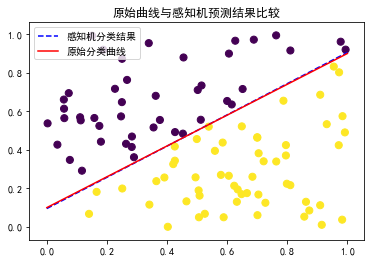

In [44]:
def perception(xn, yn):
    alpha = 0.1
    N = xn.shape[0]
    w = np.random.randn(3, 1)
    f = lambda x : np.sign(w[1]*x[0] + w[2]*x[1] + w[0])
    # The sign function returns -1 if x < 0,  0 if x==0,  1 if x > 0
    for _ in range(50000):
        i = np.random.randint(N)
        if yn[i] != f(xn[i,:]):
            # xn[0,:], xn的第一行的数据
            w[0] = w[0] + alpha * yn[i] * 1       
            w[1] = w[1] + alpha * yn[i] * xn[i, 0]
            w[2] = w[2] + alpha * yn[i] * xn[i, 1]
    return w

w = perception(xn, yn)
predict_a = - w[1] / w[2]
predict_b = - w[0] / w[2]

y = lambda x : predict_a * x + predict_b

# 分割颜色
sep_color = yn / 2.0

print(a, b)
print(predict_a, predict_b)
plt.figure()
figa = plt.gca()
plt.scatter(xn[:, 0], xn[:, 1], c=sep_color.flatten(), s=50)
plt.plot(x, y(x), 'b--', label='感知机分类结果')
plt.plot(x, f(x), 'r', label='原始分类曲线')
plt.legend()
plt.title('原始曲线与感知机预测结果比较')

    
